In [1]:
#1 Input đi qua, 2 Model sẽ tính toán ra cho ra 3 Output
#Ví dụ
#Dự báo, phân loại, Gọm cụm, Luật kết hợp
#Các phương pháp: học có giám sát, học bán giám giác
import pandas as pd
# Đường dẫn đến tệp CSV
file_path = 'de01-data.csv'
# Đọc tệp CSV vào DataFrame
df = pd.read_csv(file_path)
# Hiển thị một số dòng đầu của DataFrame
df

,TimeToPlay,TimeToStudy,ProfessionalScore,InterviewScore,Sexuality,ExpectedSalary,SocialNetworkingTimeUse,Result
0,0.1,4.4,2.5,F,T,249.6,Much,NO
1,4.1,5.7,3.7,D,L,114.6,Pretty,YES
2,7.3,0.9,2.7,D,T,862.0,Almost,NO
3,6.2,8.8,2.7,D,T,147.2,Almost,YES
4,5.0,3.1,0.2,D,Q,653.4,Pretty,NO
...,...,...,...,...,...,...,...,...
995,2.9,6.3,1.2,C,Q,512.1,Almost,YES
996,3.8,1.5,2.8,B,T,267.6,Almost,NO
997,7.4,0.6,1.3,D,Q,884.2,NaN,YES
998,8.5,5.7,3.3,C,L,662.2,Pretty,YES


In [2]:
median_time_to_study = df['TimeToStudy'].median()

# Tính phân nửa sinh viên có thời gian học lớn hơn bao nhiêu giờ
half_students_more_time = median_time_to_study / 2

# In kết quả
print(half_students_more_time)

2.6


In [3]:
correlation_matrix = df[['TimeToStudy', 'TimeToPlay', 'ProfessionalScore']].corr()

# In ma trận tương quan
print(correlation_matrix)

                   TimeToStudy  TimeToPlay  ProfessionalScore
TimeToStudy           1.000000    0.031654           0.016941
TimeToPlay            0.031654    1.000000           0.047634
ProfessionalScore     0.016941    0.047634           1.000000


In [4]:
df['ExpectedSalary']

0      249.6
1      114.6
2      862.0
3      147.2
4      653.4
       ...  
995    512.1
996    267.6
997    884.2
998    662.2
999    649.0
Name: ExpectedSalary, Length: 1000, dtype: float64

In [6]:
#khi định tính kết hợp định lượng
import statsmodels.api as sm
from statsmodels.formula.api import ols
# Điểm toán học kì 2 lớp 12 có phụ thuộc vào giới tính không
model = ols('ProfessionalScore ~ Sexuality', data=df).fit()
aov_table = sm.stats.anova_lm(model, typ=1)
aov_table

,df,sum_sq,mean_sq,F,PR(>F)
Sexuality,4.0,2.501237,0.625309,0.478149,0.751816
Residual,995.0,1301.232673,1.307772,NaN,NaN


In [7]:
#Hãy cho biết có bao nhiêu loại xu hướng tính dục trong tập dữ liệu
df.groupby('Sexuality')['TimeToPlay'].describe()

,count,mean,std,min,25%,50%,75%,max
Sexuality,,,,,,,,
B,133.0,5.214286,2.741990,0.0,2.70,5.40,7.500,9.8
G,147.0,4.563265,3.086206,0.0,1.75,4.30,7.350,10.0
L,202.0,5.339109,2.940387,0.0,2.80,5.55,7.975,9.9
Q,413.0,4.973850,2.805896,0.1,2.60,5.20,7.300,10.0
T,105.0,5.526667,2.871554,0.1,3.50,5.90,7.800,9.8


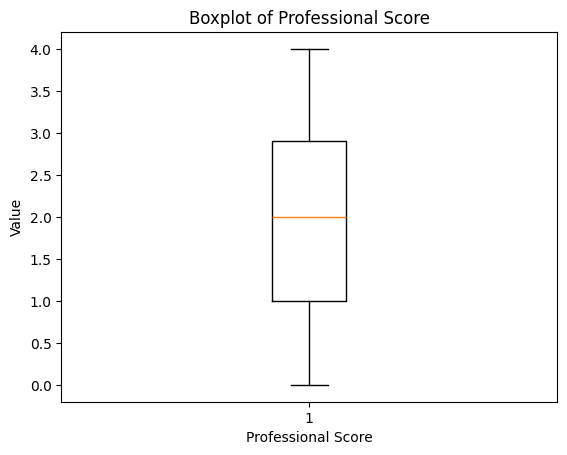

In [8]:
import matplotlib.pyplot as plt
# Vẽ biểu đồ boxplot cho cột điểm đánh giá năng lực
plt.boxplot(df["ProfessionalScore"])
plt.xlabel("Professional Score")
plt.ylabel("Value")
plt.title("Boxplot of Professional Score")
plt.show()

In [10]:
df.shape

(1000, 8)

In [11]:
skewness = df['TimeToStudy'].skew()

# Kiểm tra phân phối của biến thời gian học hằng ngày
if skewness > 0:
    print("Phân phối của biến thời gian học hằng ngày lệch phải")
elif skewness < 0:
    print("Phân phối của biến thời gian học hằng ngày lệch trái")
else:
    print("Phân phối của biến thời gian học hằng ngày là chuẩn")

Phân phối của biến thời gian học hằng ngày lệch trái


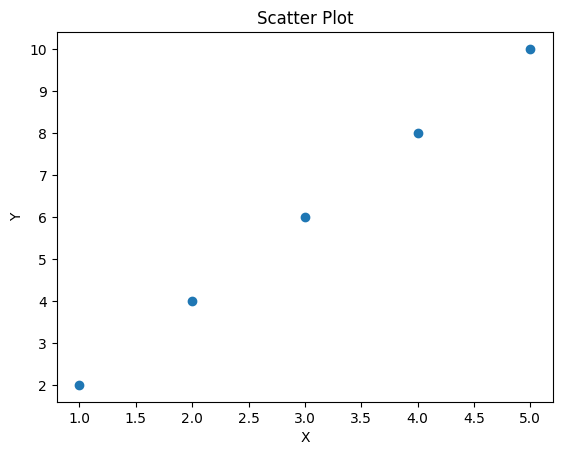

In [12]:
import matplotlib.pyplot as plt
# Giả định biến số X có phân phối chuẩn
X = [1, 2, 3, 4, 5]
# Giả định biến số Y có phân phối chuẩn tương ứng với X
Y = [2, 4, 6, 8, 10]
# Vẽ scatter plot
plt.scatter(X, Y)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Scatter Plot')
plt.show()

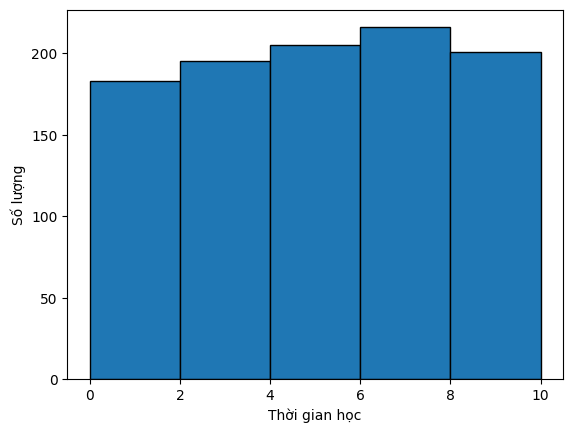

In [13]:
import matplotlib.pyplot as plt
import pandas as pd
# Vẽ histogram với 5 bins
plt.hist(df['TimeToStudy'], bins=5, edgecolor='k')
plt.xlabel('Thời gian học')
plt.ylabel('Số lượng')
plt.show()

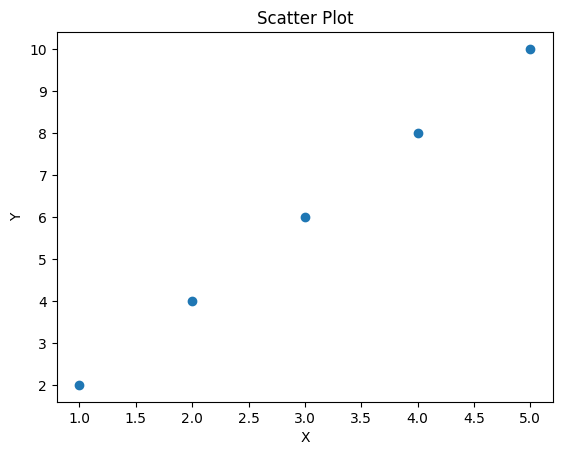

In [14]:
import matplotlib.pyplot as plt

# Giả định biến số X và Y là hai biến số định lượng
X = [1, 2, 3, 4, 5]
Y = [2, 4, 6, 8, 10]

# Vẽ scatter plot
plt.scatter(X, Y)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Scatter Plot')
plt.show()


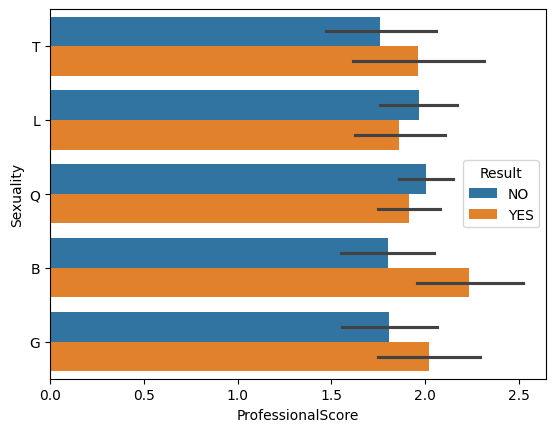

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
sns.barplot(x='ProfessionalScore', y='Sexuality', hue='Result', data=df)
plt.show()

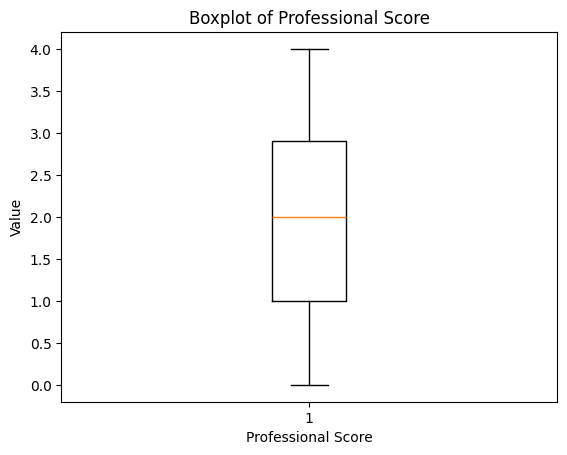

In [16]:
import matplotlib.pyplot as plt
# Vẽ biểu đồ boxplot cho cột điểm đánh giá năng lực
plt.boxplot(df["ProfessionalScore"])
plt.xlabel("Professional Score")
plt.ylabel("Value")
plt.title("Boxplot of Professional Score")
plt.show()

In [17]:
percentile_25 = df["ProfessionalScore"].quantile(0.25)
print(percentile_25)

1.0


In [19]:
correlation = df['TimeToPlay'].corr(df['TimeToStudy'])

print("Mức độ tương quan Pearson's:", correlation)

Mức độ tương quan Pearson's: 0.0316539785199572


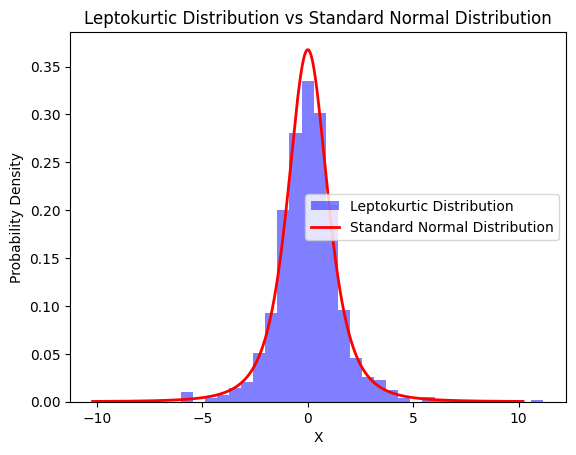

In [20]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import t
# Tham số tự do (độ leptokurtic) của phân phối Student-t
degrees_of_freedom = 3
# Sinh mẫu dữ liệu từ phân phối Student-t
data = t.rvs(degrees_of_freedom, size=1000)
# Vẽ biểu đồ histogram của dữ liệu
plt.hist(data, bins=30, density=True, alpha=0.5, color='b', label='Leptokurtic Distribution')
# Vẽ đường cong phân phối chuẩn (để so sánh)
x = np.linspace(t.ppf(0.001, degrees_of_freedom), t.ppf(0.999, degrees_of_freedom), 1000)
plt.plot(x, t.pdf(x, degrees_of_freedom), 'r-', lw=2, label='Standard Normal Distribution')
plt.title('Leptokurtic Distribution vs Standard Normal Distribution')
plt.xlabel('X')
plt.ylabel('Probability Density')
plt.legend()
plt.show()


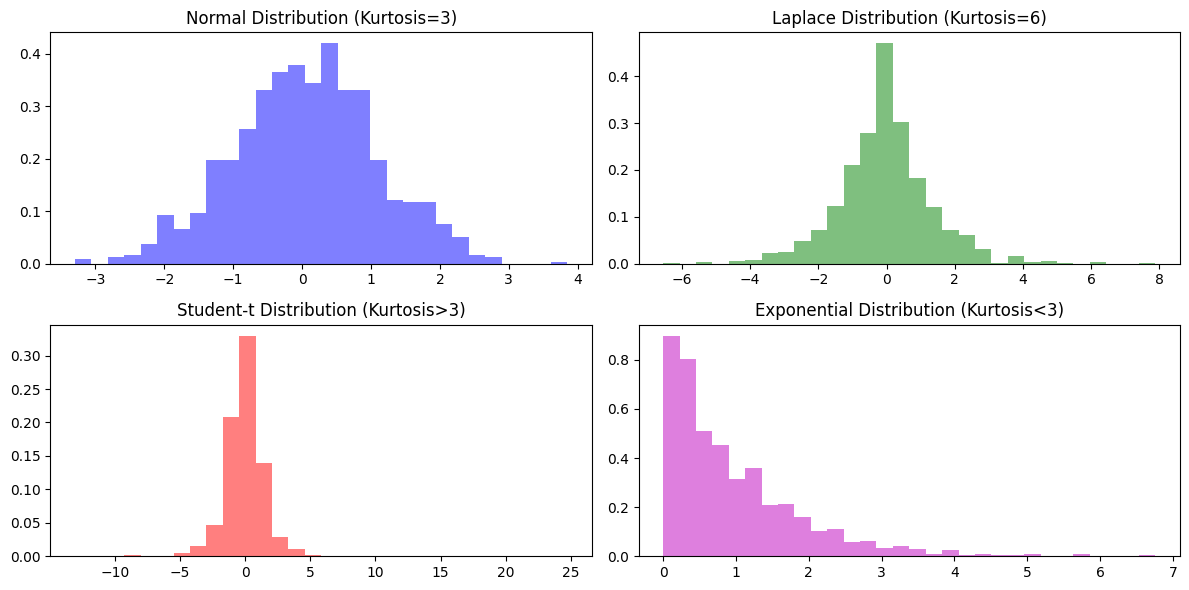

In [21]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm, laplace, t, expon

# Tạo dữ liệu từ các phân phối khác nhau
data_normal = norm.rvs(size=1000)
data_laplace = laplace.rvs(size=1000)
data_student_t = t.rvs(3, size=1000)  # Phân phối Student-t có kurtosis
data_exponential = expon.rvs(size=1000)  # Phân phối mũ có kurtosis âm

# Vẽ biểu đồ các phân phối
plt.figure(figsize=(12, 6))

plt.subplot(2, 2, 1)
plt.hist(data_normal, bins=30, density=True, alpha=0.5, color='b')
plt.title('Normal Distribution (Kurtosis=3)')

plt.subplot(2, 2, 2)
plt.hist(data_laplace, bins=30, density=True, alpha=0.5, color='g')
plt.title('Laplace Distribution (Kurtosis=6)')

plt.subplot(2, 2, 3)
plt.hist(data_student_t, bins=30, density=True, alpha=0.5, color='r')
plt.title('Student-t Distribution (Kurtosis>3)')

plt.subplot(2, 2, 4)
plt.hist(data_exponential, bins=30, density=True, alpha=0.5, color='m')
plt.title('Exponential Distribution (Kurtosis<3)')

plt.tight_layout()
plt.show()


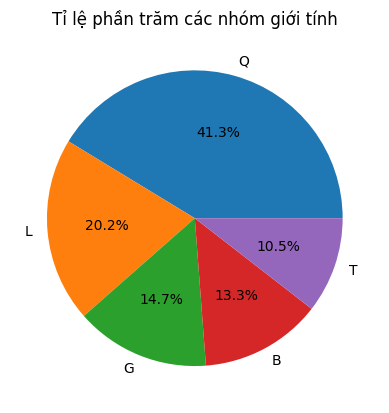

In [22]:
import matplotlib.pyplot as plt
gender_counts = df['Sexuality'].value_counts()
gender_percentages = gender_counts / gender_counts.sum() * 100

# Vẽ biểu đồ Pie
plt.pie(gender_percentages, labels=gender_percentages.index, autopct='%1.1f%%')
plt.title("Tỉ lệ phần trăm các nhóm giới tính")
plt.show()

In [23]:
import pandas as pd
# Giả định df là DataFrame của bạn
# Tạo bảng Crosstab giữa xu hướng tình dục và điểm phỏng vấn
crosstab_result = pd.crosstab(df['Sexuality'], df['InterviewScore'])
# Tìm giá trị lớn nhất trong bảng Crosstab
max_value = crosstab_result.values.max()
print("Giá trị lớn nhất trong bảng Crosstab là:", max_value)

Giá trị lớn nhất trong bảng Crosstab là: 126


In [24]:
max_score = df["ProfessionalScore"].max()
# Đếm số lượng sinh viên có điểm đánh giá năng lực bằng giá trị lớn nhất
count = df[df["ProfessionalScore"] == max_score].shape[0]
# In số lượng sinh viên đạt điểm đánh giá năng lực cao nhất
print(count)

15


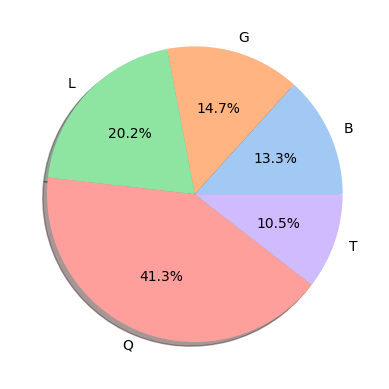

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
gb=df.groupby(['Sexuality'])['Sexuality'].agg(['count'])
labels=gb.index
data=list(gb['count'])
colors=sns.color_palette('pastel')
plt.pie(data,labels=labels,colors=colors,autopct='%1.1f%%',shadow=True)
plt.show()

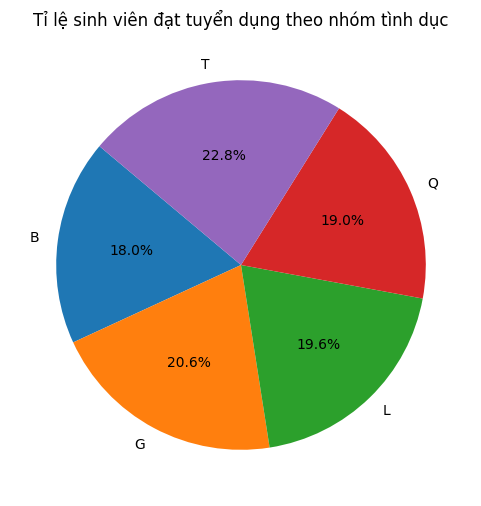

In [26]:
# Tính tỷ lệ phần trăm số lượng sinh viên trong mỗi nhóm tình dục mà đã đạt tuyển dụng
recruited_counts = df[df['Result'] == 'NO']['Sexuality'].value_counts()
total_counts = df['Sexuality'].value_counts()
percentage_recruited = (recruited_counts / total_counts) * 100
# Tạo một biểu đồ Pie
plt.figure(figsize=(6, 6))
plt.pie(percentage_recruited, labels=percentage_recruited.index, autopct='%1.1f%%', startangle=140)
plt.title('Tỉ lệ sinh viên đạt tuyển dụng theo nhóm tình dục')
plt.show()

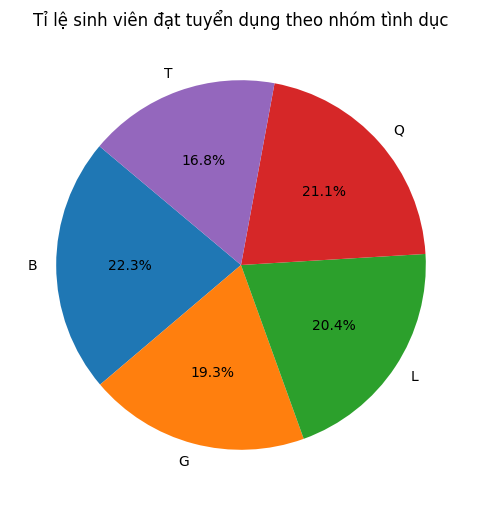

In [27]:


# Lọc ra chỉ các sinh viên đã đạt tuyển dụng
recruited_students = df[df['Result'] == 'YES']

# Tính tỷ lệ phần trăm số lượng sinh viên trong mỗi nhóm tình dục mà đã đạt tuyển dụng
recruited_counts = recruited_students['Sexuality'].value_counts()
total_counts = df['Sexuality'].value_counts()
percentage_recruited = (recruited_counts / total_counts) * 100

# Tạo một biểu đồ Pie
plt.figure(figsize=(6, 6))
plt.pie(percentage_recruited, labels=percentage_recruited.index, autopct='%1.1f%%', startangle=140)
plt.title('Tỉ lệ sinh viên đạt tuyển dụng theo nhóm tình dục')

plt.show()

In [28]:
# Tính giá trị trung vị của cột 'TimeToStudy'
median_time_to_study = df['TimeToStudy'].median()
# Tính phân nửa sinh viên có thời gian học lớn hơn bao nhiêu giờ
half_students_more_than_median = (df['TimeToStudy'] > median_time_to_study).sum()
print(f"Giá trị trung vị của thời gian học là {median_time_to_study} giờ.")
print(f"Phân nửa sinh viên có thời gian học lớn hơn {median_time_to_study} giờ.")
print(f"Số sinh viên có thời gian học lớn hơn trung vị: {half_students_more_than_median} sinh viên.")

Giá trị trung vị của thời gian học là 5.2 giờ.
Phân nửa sinh viên có thời gian học lớn hơn 5.2 giờ.
Số sinh viên có thời gian học lớn hơn trung vị: 495 sinh viên.


In [29]:
# Tạo pivot table với trung bình thời gian học theo nhóm xu hướng tính dục và kết quả phỏng vấn
pivot_table = pd.pivot_table(df, values='TimeToStudy', index='Sexuality', columns='Result', aggfunc='mean')
# In bảng pivot table
print(pivot_table)

Result           NO       YES
Sexuality                    
B          5.473438  4.785507
G          5.240741  5.828788
L          4.750000  5.464583
Q          4.877143  5.167488
T          4.165625  5.034146


In [30]:
import scipy.stats as stats
sample_mean = df['ProfessionalScore'].mean()

# Giá trị trung bình giả định
population_mean = 2.4575

# Số lượng quan sát
n = len(df)

# Độ lệch chuẩn mẫu
sample_std = df['ProfessionalScore'].std()

# Mức tin cậy
confidence_level = 0.95

# Số tự do
degrees_of_freedom = n - 1

# Sử dụng t-test để kiểm tra giả thuyết
t_statistic, p_value = stats.ttest_1samp(df['ProfessionalScore'], population_mean)

# In kết quả
print(f"Giá trị trung bình mẫu: {sample_mean}")
print(f"T-statistic: {t_statistic}")
print(f"P-value: {p_value}")

alpha = 1 - confidence_level

if p_value < alpha:
    print("Có đủ bằng chứng để bác bỏ giả thuyết không.")
else:
    print("Không có đủ bằng chứng để bác bỏ giả thuyết không.")

Giá trị trung bình mẫu: 1.9397
T-statistic: -14.333435926932262
P-value: 1.634730670328841e-42
Có đủ bằng chứng để bác bỏ giả thuyết không.


In [31]:
# Tạo bảng Crosstab giữa 'sex' và 'interscore'
crosstab_result = pd.crosstab(df['Sexuality'], df['InterviewScore'])

# Tìm giá trị yếu vị
mode_value = crosstab_result.mode()

print("Giá trị yếu vị trong bảng Crosstab là:\n", mode_value)

Giá trị yếu vị trong bảng Crosstab là:
 InterviewScore   A   B    C    D   F
0                5  15   30   32  21
1                6  19   31   42  32
2                8  24   40   46  34
3                9  37   64   54  38
4               16  65  126  122  84
